<a href="https://colab.research.google.com/github/santiagonajera/AnalisisSeriesTemporales/blob/main/PlanificacionDemanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-122fe66720c5>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df['Producto 1'].resample('M').sum()


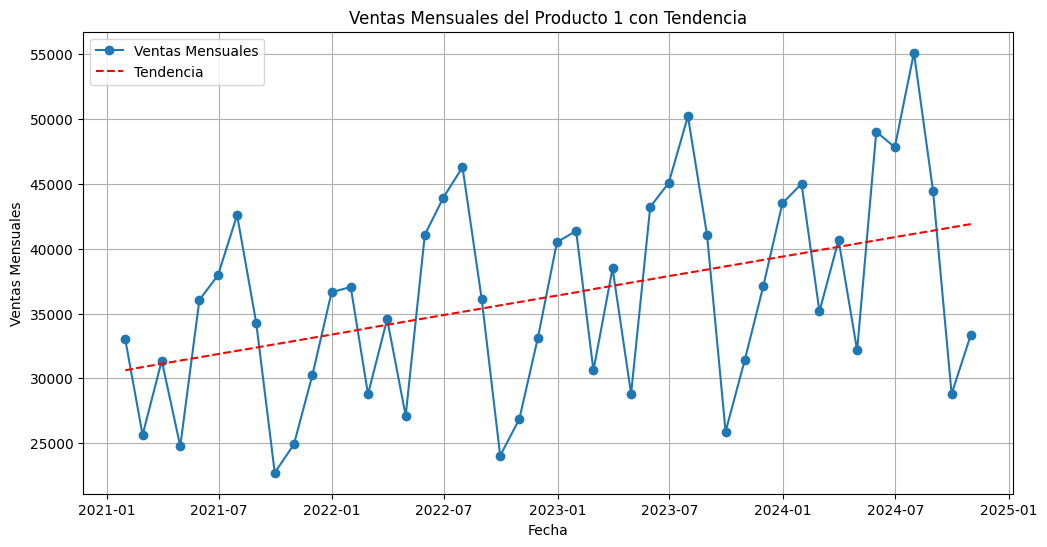

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL del archivo en GitHub
url = "https://github.com/santiagonajera/AnalisisSeriesTemporales/raw/refs/heads/main/ventas_diarias_2021_2022.xlsx"

# Cargar los datos desde el archivo Excel en la URL
df = pd.read_excel(url, sheet_name='Sheet1')

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Agrupar por mes y sumar las ventas del Producto 1
ventas_mensuales = df['Producto 1'].resample('M').sum()

# Crear un DataFrame con las ventas mensuales
ventas_mensuales_df = ventas_mensuales.reset_index()
ventas_mensuales_df.columns = ['Fecha', 'Ventas Mensuales']

# Graficar las ventas mensuales y la tendencia
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales_df['Fecha'], ventas_mensuales_df['Ventas Mensuales'], label='Ventas Mensuales', marker='o')

# Añadir una línea de tendencia
z = np.polyfit(range(len(ventas_mensuales_df)), ventas_mensuales_df['Ventas Mensuales'], 1)
p = np.poly1d(z)
plt.plot(ventas_mensuales_df['Fecha'], p(range(len(ventas_mensuales_df))), "r--", label='Tendencia')

# Añadir etiquetas y título
plt.title('Ventas Mensuales del Producto 1 con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

<ipython-input-2-f5e4b6acb89c>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df['Producto 1'].resample('M').sum()


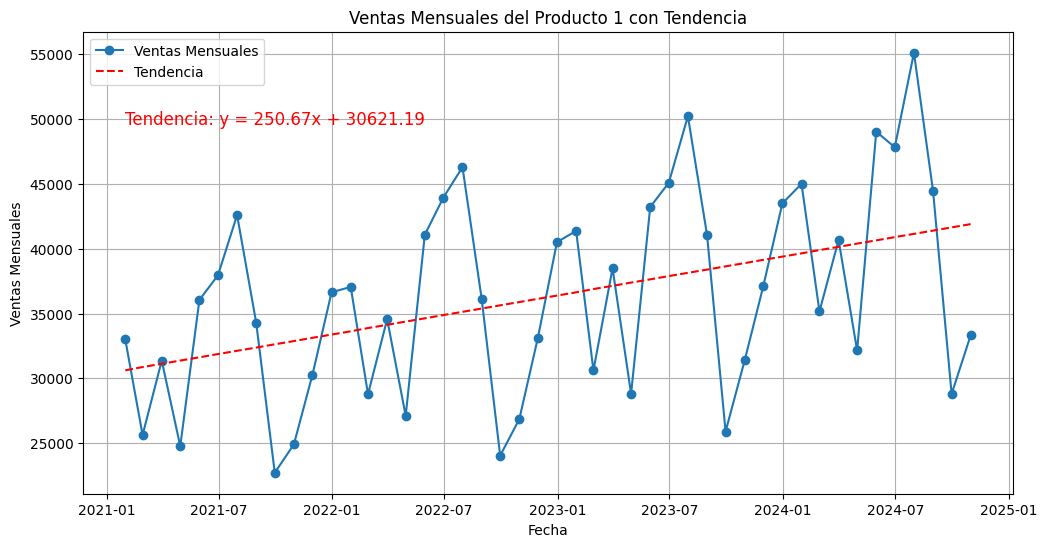

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URL del archivo en GitHub
url = "https://github.com/santiagonajera/AnalisisSeriesTemporales/raw/refs/heads/main/ventas_diarias_2021_2022.xlsx"

# Cargar los datos desde el archivo Excel en la URL
df = pd.read_excel(url, sheet_name='Sheet1')

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Agrupar por mes y sumar las ventas del Producto 1
ventas_mensuales = df['Producto 1'].resample('M').sum()

# Crear un DataFrame con las ventas mensuales
ventas_mensuales_df = ventas_mensuales.reset_index()
ventas_mensuales_df.columns = ['Fecha', 'Ventas Mensuales']

# Graficar las ventas mensuales y la tendencia
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales_df['Fecha'], ventas_mensuales_df['Ventas Mensuales'], label='Ventas Mensuales', marker='o')

# Calcular la línea de tendencia
z = np.polyfit(range(len(ventas_mensuales_df)), ventas_mensuales_df['Ventas Mensuales'], 1)
p = np.poly1d(z)
plt.plot(ventas_mensuales_df['Fecha'], p(range(len(ventas_mensuales_df))), "r--", label='Tendencia')

# Añadir la ecuación de la tendencia al gráfico
tendencia_ecuacion = f'Tendencia: y = {z[0]:.2f}x + {z[1]:.2f}'
plt.text(ventas_mensuales_df['Fecha'].iloc[0], max(ventas_mensuales_df['Ventas Mensuales']) * 0.9, tendencia_ecuacion, fontsize=12, color='red')

# Añadir etiquetas y título
plt.title('Ventas Mensuales del Producto 1 con Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

<ipython-input-3-fa6decb35e86>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df['Producto 1'].resample('M').sum()


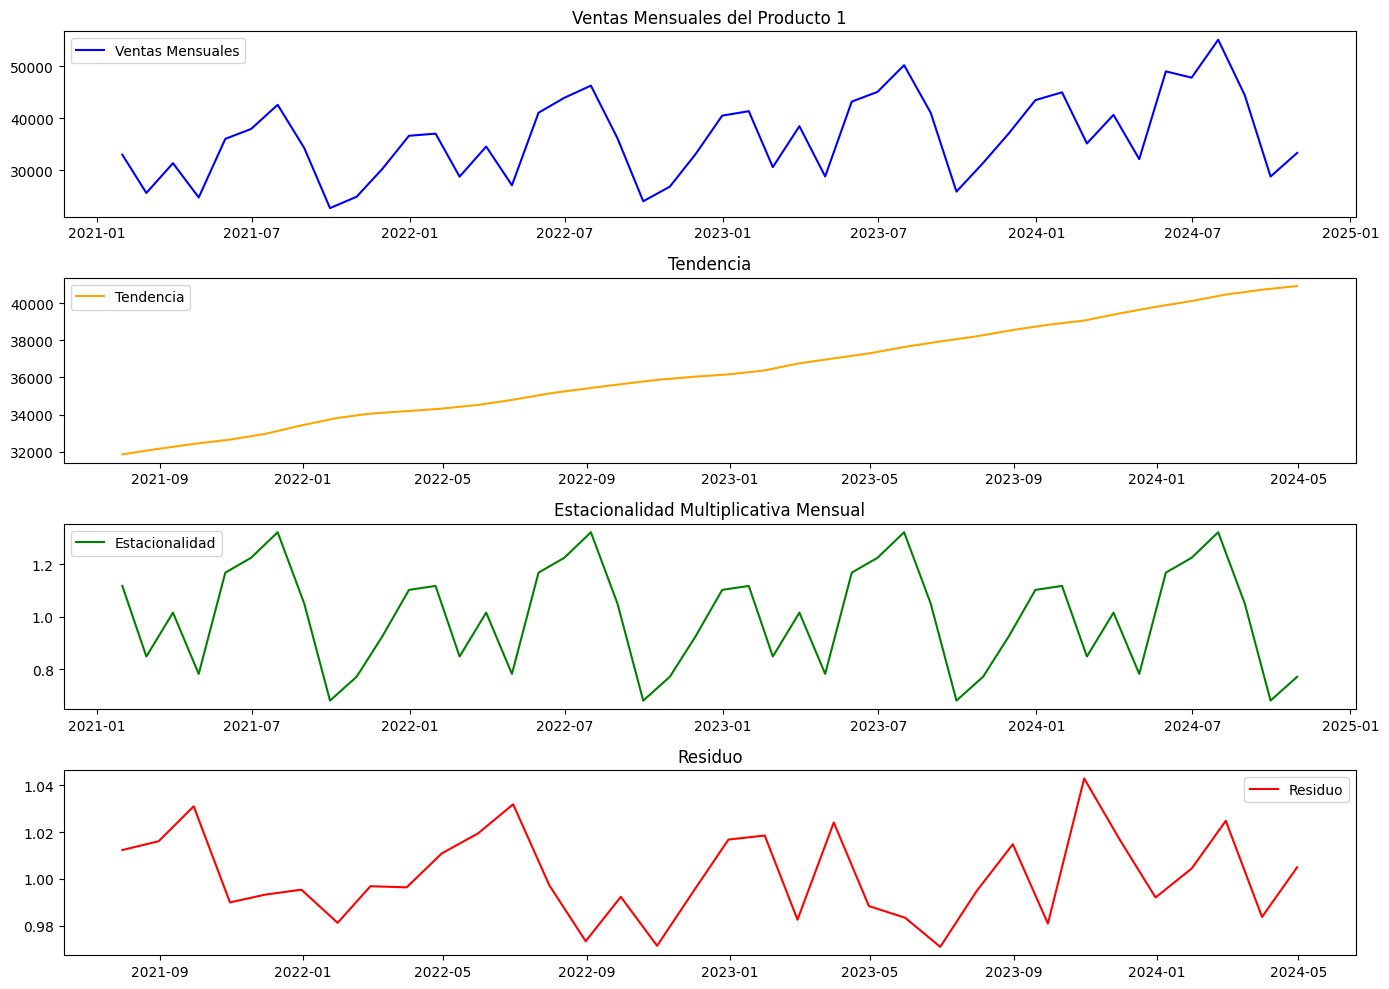

Estacionalidad Mensual:
                Fecha  Estacionalidad
Fecha                                
2021-01-31 2021-01-31        1.116749
2021-02-28 2021-02-28        0.847804
2021-03-31 2021-03-31        1.014974
2021-04-30 2021-04-30        0.781539
2021-05-31 2021-05-31        1.167460
2021-06-30 2021-06-30        1.223974
2021-07-31 2021-07-31        1.321303
2021-08-31 2021-08-31        1.049383
2021-09-30 2021-09-30        0.679771
2021-10-31 2021-10-31        0.770611
2021-11-30 2021-11-30        0.924712
2021-12-31 2021-12-31        1.101719
2022-01-31 2022-01-31        1.116749
2022-02-28 2022-02-28        0.847804
2022-03-31 2022-03-31        1.014974
2022-04-30 2022-04-30        0.781539
2022-05-31 2022-05-31        1.167460
2022-06-30 2022-06-30        1.223974
2022-07-31 2022-07-31        1.321303
2022-08-31 2022-08-31        1.049383
2022-09-30 2022-09-30        0.679771
2022-10-31 2022-10-31        0.770611
2022-11-30 2022-11-30        0.924712
2022-12-31 2022-12-31     

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# URL del archivo en GitHub
url = "https://github.com/santiagonajera/AnalisisSeriesTemporales/raw/refs/heads/main/ventas_diarias_2021_2022.xlsx"

# Cargar los datos desde el archivo Excel en la URL
df = pd.read_excel(url, sheet_name='Sheet1')

# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Agrupar por mes y sumar las ventas del Producto 1
ventas_mensuales = df['Producto 1'].resample('M').sum()

# Descomposición de la serie temporal (estacionalidad multiplicativa)
descomposicion = seasonal_decompose(ventas_mensuales, model='multiplicative', period=12)

# Extraer los componentes
tendencia = descomposicion.trend
estacionalidad = descomposicion.seasonal
residuo = descomposicion.resid

# Crear un DataFrame con los componentes
componentes = pd.DataFrame({
    'Fecha': ventas_mensuales.index,
    'Ventas': ventas_mensuales,
    'Tendencia': tendencia,
    'Estacionalidad': estacionalidad,
    'Residuo': residuo
})

# Graficar los componentes
plt.figure(figsize=(14, 10))

# Gráfico de las ventas originales
plt.subplot(4, 1, 1)
plt.plot(componentes['Fecha'], componentes['Ventas'], label='Ventas Mensuales', color='blue')
plt.title('Ventas Mensuales del Producto 1')
plt.legend()

# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(componentes['Fecha'], componentes['Tendencia'], label='Tendencia', color='orange')
plt.title('Tendencia')
plt.legend()

# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(componentes['Fecha'], componentes['Estacionalidad'], label='Estacionalidad', color='green')
plt.title('Estacionalidad Multiplicativa Mensual')
plt.legend()

# Gráfico del residuo
plt.subplot(4, 1, 4)
plt.plot(componentes['Fecha'], componentes['Residuo'], label='Residuo', color='red')
plt.title('Residuo')
plt.legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()

# Mostrar la estacionalidad mensual
estacionalidad_mensual = componentes[['Fecha', 'Estacionalidad']].dropna()
print("Estacionalidad Mensual:")
print(estacionalidad_mensual)